In [12]:
import random
from queue import PriorityQueue
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
ARRIVAL = 1/3  # Fixed average inter-arrival time
SIM_TIME = 500000  # Total simulation time
SERVICE_VALUES = [i for i in range(5, 41, 2)]  # Average service times: 5.0 to 40.0 in steps of 2
TYPE1 = 1
SEED = 123 #fixed seed here 

In [13]:
class Measure:
    def __init__(self, arr=0, dep=0, ut=0, oldT=0, delay=0):
        self.arr = arr
        self.dep = dep
        self.ut = ut
        self.oldT = oldT
        self.delay = delay

In [5]:
class Client:
    def __init__(self, type, arrival_time):
        self.type = type
        self.arrival_time = arrival_time


In [14]:
def run_simulation(service_time):
    global users, data, MM1
    users = 0
    data = Measure(0, 0, 0, 0, 0)
    MM1 = []
    time = 0
    FES = PriorityQueue()
    busy_time = 0.0

    def arrival(current_time):
        nonlocal busy_time
        global users
        data.arr += 1
        data.ut += users * (current_time - data.oldT)
        data.oldT = current_time
        inter_arrival = random.expovariate(1.0 / ARRIVAL)
        FES.put((current_time + inter_arrival, "arrival"))
        users += 1
        client = Client(TYPE1, current_time)
        MM1.append(client)
        if users == 1:
            currentservice_time = random.expovariate(1/service_time)
            busy_time += currentservice_time
            FES.put((current_time + currentservice_time, "departure"))

    def departure(current_time):
        nonlocal busy_time
        global users
        data.dep += 1
        data.ut += users * (current_time - data.oldT)
        data.oldT = current_time
        client = MM1.pop(0)
        data.delay += (current_time - client.arrival_time)
        users -= 1
        if users > 0:
            currentservice_time = random.expovariate(1/service_time)
            busy_time += currentservice_time
            FES.put((current_time + currentservice_time, "departure"))

    random.seed(SEED)
    FES.put((0.0, "arrival"))
    while time < SIM_TIME:
        time, event_type = FES.get()
        if event_type == "arrival":
            arrival(time)
        elif event_type == "departure":
            departure(time)

    avg_delay = data.delay / data.dep if data.dep > 0 else 0
    avg_users = data.ut / time
    utilization = busy_time / time
    return avg_delay, avg_users, utilization

# Run simulation for each service rate
results = []
for servicetime in SERVICE_VALUES:
    
    delay, avg_users, utilization = run_simulation(1/servicetime)
    results.append({
        "Service Rate (μ)": round(servicetime, 4),
        "Average Delay": delay,
        "Average Users": avg_users,
        "Utilization": utilization
    })


In [15]:
# Create DataFrame and plot metrics
df_results = pd.DataFrame(results)
print("Task 1.a - Effect of Service Rate on System Metrics")
print(df_results)


Task 1.a - Effect of Service Rate on System Metrics
    Service Rate (μ)  Average Delay  Average Users  Utilization
0                  5       0.502905       1.509806     0.600916
1                  7       0.250662       0.752548     0.429249
2                  9       0.166745       0.500260     0.333412
3                 11       0.125062       0.375243     0.272845
4                 13       0.100001       0.299937     0.230700
5                 15       0.083285       0.249788     0.199921
6                 17       0.071398       0.214144     0.176411
7                 19       0.062471       0.187365     0.157838
8                 21       0.055543       0.166599     0.142825
9                 23       0.049979       0.149904     0.130393
10                25       0.045435       0.136274     0.119962
11                27       0.041643       0.124894     0.111065
12                29       0.038442       0.115301     0.103417
13                31       0.035696       0.107065  

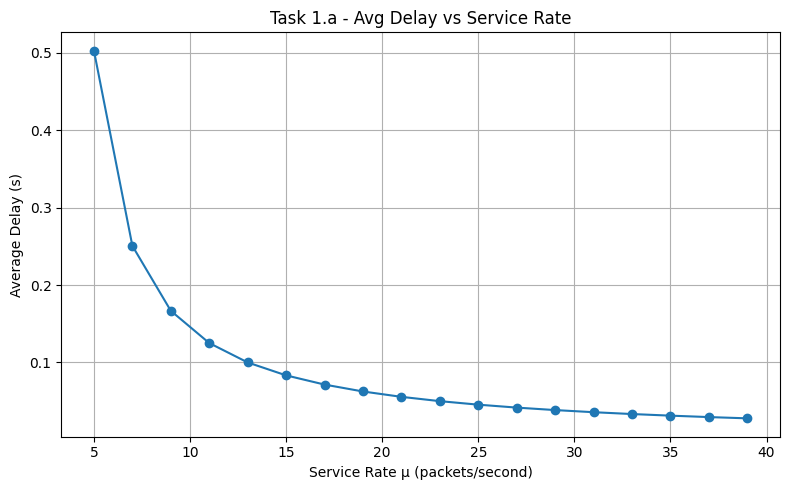

In [17]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_results["Service Rate (μ)"], df_results["Average Delay"], marker='o')
plt.xlabel("Service Rate μ (packets/second)")
plt.ylabel("Average Delay (s)")
plt.title("Task 1.a - Avg Delay vs Service Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


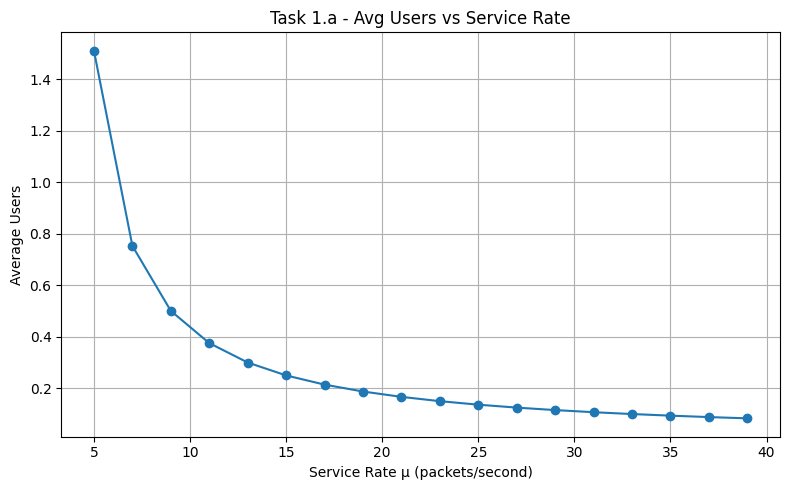

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(df_results["Service Rate (μ)"], df_results["Average Users"], marker='o')
plt.xlabel("Service Rate μ (packets/second)")
plt.ylabel("Average Users")
plt.title("Task 1.a - Avg Users vs Service Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

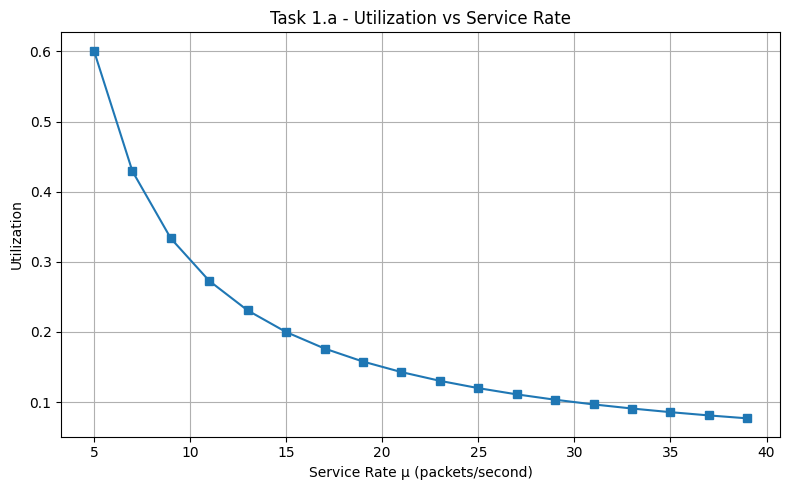

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(df_results["Service Rate (μ)"], df_results["Utilization"], marker='s')
plt.xlabel("Service Rate μ (packets/second)")
plt.ylabel("Utilization")
plt.title("Task 1.a - Utilization vs Service Rate")
plt.grid(True)
plt.tight_layout()
plt.show()